In [226]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
import numpy as np
from poly import *
import matplotlib.pyplot as plt
import scipy

plt.rcParams.update({'font.size': 16})
plt.style.use('bmh')

np.set_printoptions(edgeitems=3, infstr='inf',
linewidth=75, nanstr='nan', precision=3,
suppress=False, threshold=1000, formatter=None)

In [294]:
f = lambda x: (np.sin(np.pi*x))**2
# f = lambda x: 2*x**2-1
# f = lambda x: x/2 - np.sin(2*np.pi*x)/(4*np.pi)+1/2
a = -1; b=1; m = 3
int_f = lambda x: x/2 - np.sin(2*np.pi*x)/(4*np.pi)+1/2
BF, BF_I, JFP, JFS, DFP, DFS, ts = base_fourier(a, b, m)
x_eval = np.linspace(a, b, 200)
y = f(ts)

BF_eval = b_fourrier(x_eval, a, b, m)

y_fft = standard_fft(np.fft.fft(y))
y_eval = BF_eval@y_fft

In [297]:
JFS

array([[ 1.   ,  0.   , -1.   ,  0.   ,  0.5  ,  0.   , -0.333],
       [ 0.   ,  0.   , -1.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.5  ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.5  ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.333],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.333,  0.   ]])

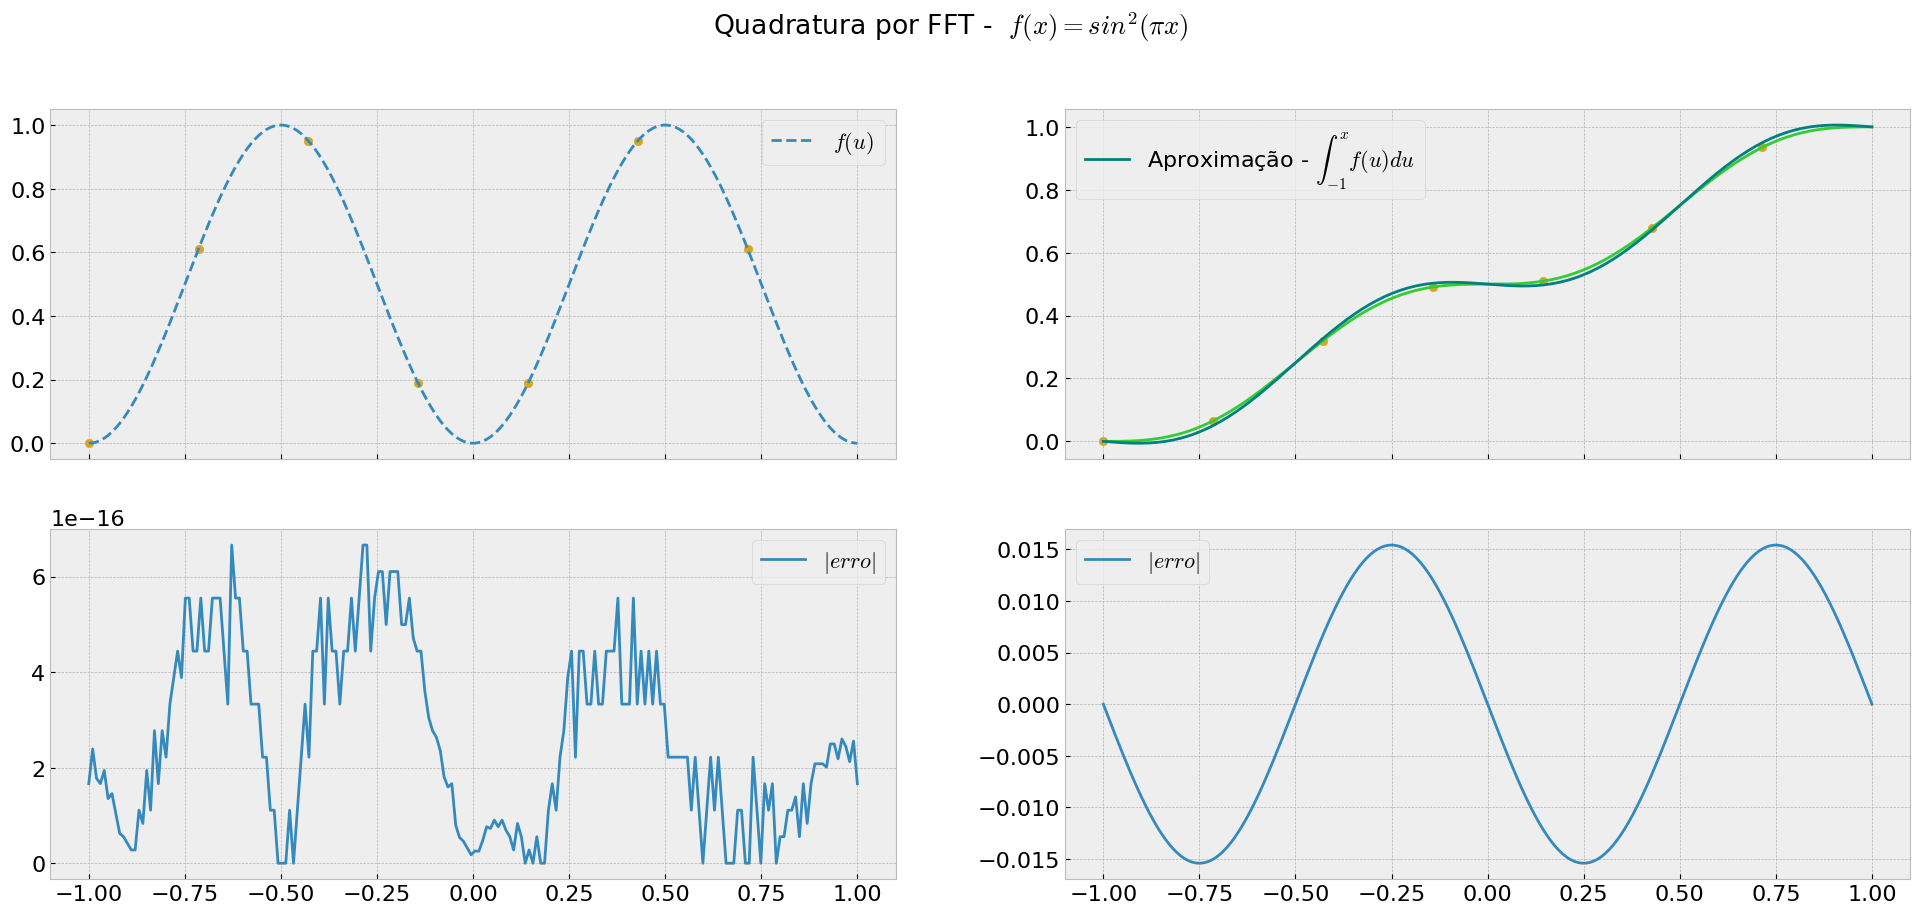

In [313]:
fig, ax = plt.subplots(2, 2, figsize=(24,10), sharex = True)
ax[0, 0].plot(x_eval, y_eval, linestyle ="--", label=r"$f(u)$ ")
ax[0, 0].scatter(ts, BF@y_fft, color = "goldenrod", marker="o",)

ax[1, 0].plot(x_eval, np.abs(f(x_eval)-y_eval), label = r"$|erro|$")


int_f_fft = BF_eval@JFS@y_fft + y_fft[0]*(x_eval) + 0.155*BF_eval[:, 4]
ax[0, 1].scatter(ts, int_f(ts), color = "goldenrod", marker="o")
ax[0, 1].plot(x_eval, int_f(x_eval), color="limegreen")
ax[0, 1].plot(x_eval, int_f_fft, color="teal", label=r"Aproximação - $\int_{-1}^{x}f(u)du$ ")
ax[1, 1].plot(x_eval, (int_f_fft - int_f(x_eval)), label = r"$|erro|$" )

ax[0,0].legend()
ax[1,0].legend()
ax[0, 1].legend()
ax[1, 1].legend()

fig.suptitle(r"Quadratura por FFT -  $f(x) = sin^2(\pi x)$")

fig.savefig("images/quad_fft.pdf")

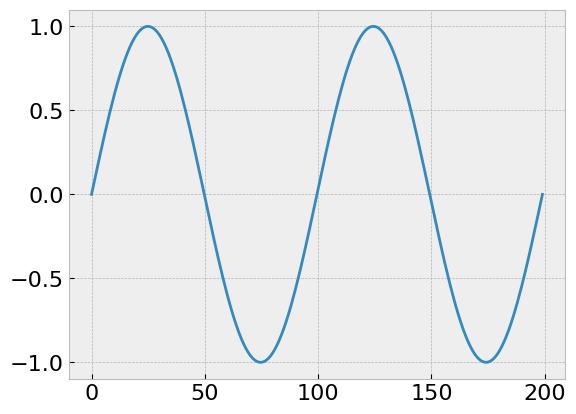

In [311]:
plt.plot(BF_eval[:, 4])